# Model Comparison

Now that we have attained the four models trained on the training set, we must compare the performance of these models on the test set. First we import some necessary libraries.

In [1]:
import os
import pandas as pd
import random
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

## 1. Retrieve Results

Each model has a list of predictions for the test set where they give their respective probabilities of a case having heart disease based on given information for the other features. We read each list of probabilities in and store them in an array.

In [2]:
url='https://drive.google.com/file/d/1oSwxgERDxrEQKoUGj5a-onQoodnVLEbO/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
LR_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1Nj2U2jn4m8l_1kHobQkEWmYJEDPRFwhr/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
BDT_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1XnP_YbaQIna-2FarDxSLman2niQP30nC/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
KNN_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1DNsZAqzjk-5mEDaOGY2wK9t0vlZxSnPb/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
lin_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1Gfq07W8nsKJchehPPIm5hYHDOTKbSqDu/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
pres_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1IGdBM6G27ylOwM1vOolY_oVePyqYDOMU/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
NM_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1qkbZ7ZctdRZXez9FPPHNavVRfXGD8PSf/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test_df = pd.read_csv(url)

In [3]:
LR = LR_df['Probabilities']
BDT = BDT_df['Probability of Heart Disease']
KNN = KNN_df['0']
lin = lin_df['Probabilities']
pres = pres_df['0']
NM = NM_df['Probability of Heart Disease']

test = test_df['HeartDiseaseorAttack']

## 2. Producing Curves

We now take the probabilities produced by the models and produce three types of curve based on these values and the true values stored in "test". The types of curve will be ROC curves, precision-recall curves and recall-threshold curves.

Here, we generate the points for the ROC curves using the "roc_curve" function in the sk-learn "metrics" package and we generate the points for the precision-recall and recall-threshold curves using the "precision_recall_curve" function in the sk-learn "metrics".

In [4]:
from sklearn.metrics import roc_curve
LR_fpr, LR_tpr, _ = roc_curve(test, LR)
BDT_fpr, BDT_tpr, _ = roc_curve(test, BDT)
KNN_fpr, KNN_tpr, _ = roc_curve(test, KNN)
lin_fpr, lin_tpr, _ = roc_curve(test, lin)
pres_fpr, pres_tpr, _ = roc_curve(test, pres)
NM_fpr, NM_tpr, _ = roc_curve(test, NM)

In [5]:
from sklearn.metrics import precision_recall_curve
LR_pre, LR_rec, LR_thr = precision_recall_curve(test, LR)
BDT_pre, BDT_rec, BDT_thr = precision_recall_curve(test, BDT)
KNN_pre, KNN_rec, KNN_thr = precision_recall_curve(test, KNN)
lin_pre, lin_rec, lin_thr = precision_recall_curve(test, lin)
pres_pre, pres_rec, pres_thr = precision_recall_curve(test, pres)
NM_pre, NM_rec, NM_thr = precision_recall_curve(test, NM)

## 3. KNN and Boosted Decision Tree Within-Family Comparisons

The KNN and Boosted Decision Tree models each have two different models. KNN has an equal model where the model was trained off half positive, half negative data and a preserved model where the model was trained off the ratio of positive and negative cases in the dataset. The Boosted Decision Tree uses two models, the one trained on the imputed training set and another trained on the original dataset.

We plot all 3 curves to compare the models, to see if one clearly outperforms the other.

### 3.1 KNN Within-Family Comparison

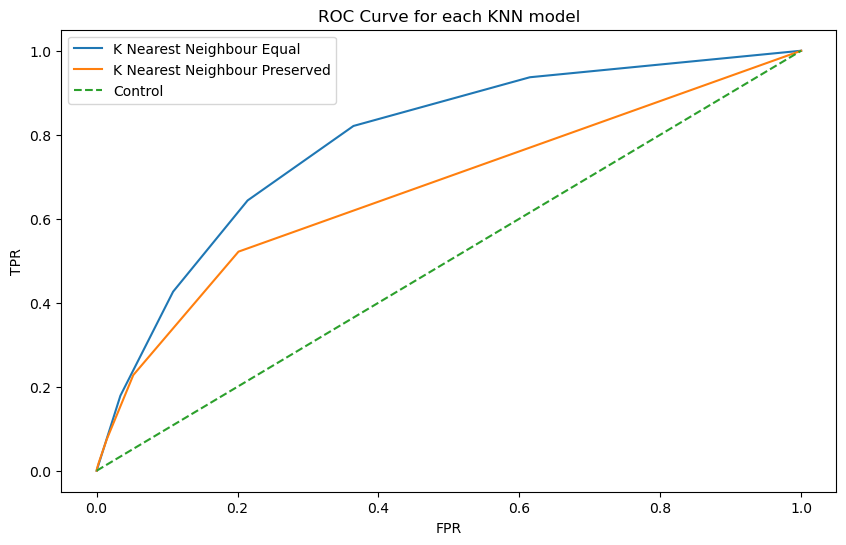

In [6]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(KNN_fpr, KNN_tpr, label='K Nearest Neighbour Equal')
plt.plot(pres_fpr, pres_tpr, label='K Nearest Neighbour Preserved')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each KNN model')
plt.legend()
plt.show()

We look at the AUC (Area Under the Curve) score for each curve to get a numerical answer to which model performed the best, after having made our visual observations that there are no points of overlap. Thus, the larger the AUC, the better the model predictions are with ROC as the metric.

In [ ]:
from sklearn.metrics import roc_auc_score
print("KNN Equal: " + str(roc_auc_score(test, KNN)))
print("KNN Preserved: " + str(roc_auc_score(test, pres)))

Now we check the Precision-Recall and Recall-Threshold curves.

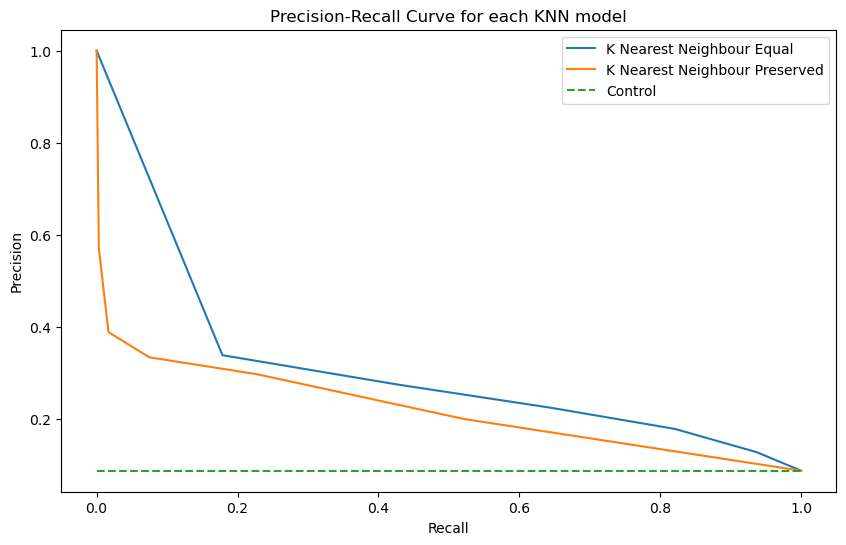

In [11]:
control_val = test.value_counts()[1] / len(test)
x=[0,1]
y=[control_val, control_val]
plt.figure(figsize=(10,6))
plt.plot(KNN_rec, KNN_pre, label='K Nearest Neighbour Equal')
plt.plot(pres_rec, pres_pre, label='K Nearest Neighbour Preserved')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each KNN model')
plt.legend()
plt.show()

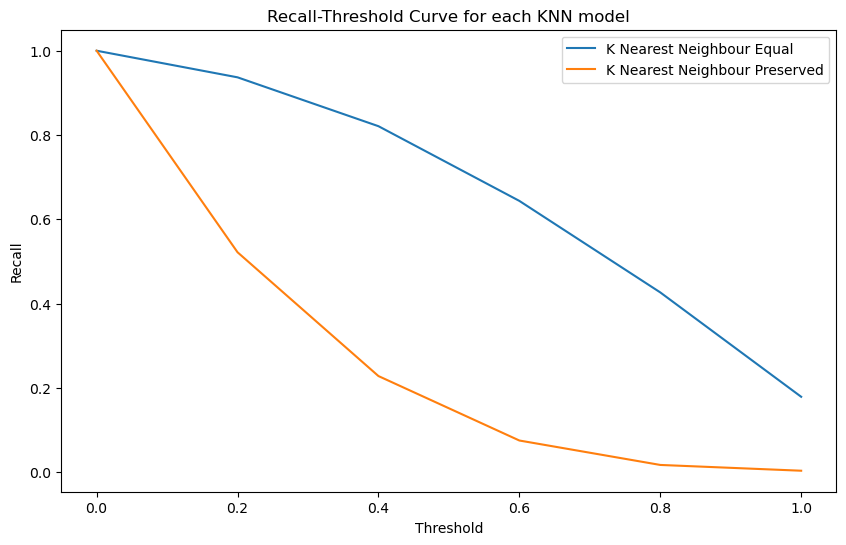

In [12]:
plt.figure(figsize=(10,6))
plt.plot(KNN_thr, KNN_rec[0:len(KNN_rec)-1], label='K Nearest Neighbour Equal')
plt.plot(pres_thr, pres_rec[0:len(pres_rec)-1], label='K Nearest Neighbour Preserved')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall-Threshold Curve for each KNN model')
plt.legend()
plt.show()

The equal class proportions model performs better in all metrics so we will discard the preserved proportions model.

### 3.1 Boosted Decision Tree Within-Family Comparison

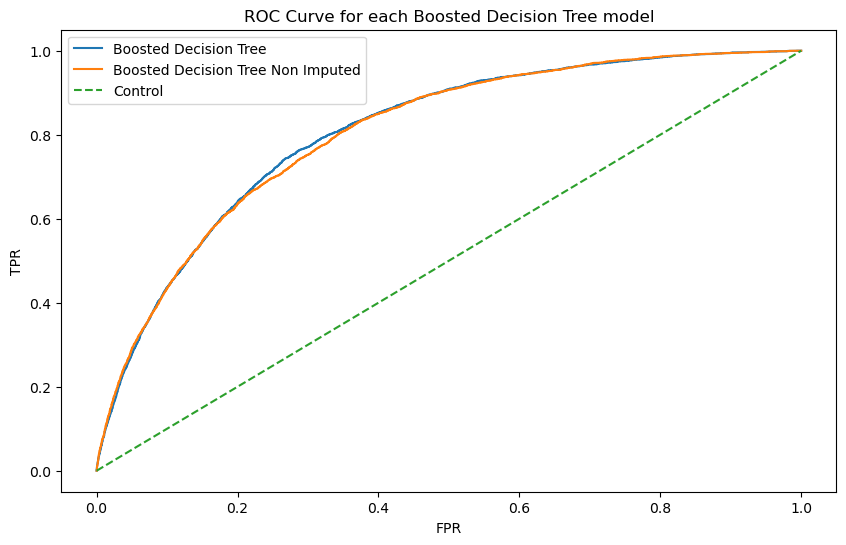

In [27]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(BDT_fpr, BDT_tpr, label='Boosted Decision Tree')
plt.plot(NM_fpr, NM_tpr, label='Boosted Decision Tree Non Imputed')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each Boosted Decision Tree model')
plt.legend()
plt.show()

In [22]:
print("AUC Scores:")
print("Boosted Decision Tree: " + str(roc_auc_score(test, BDT)))
print("BDT Non Imputed " + str(roc_auc_score(test, NM)))

AUC Scores:
Boosted Decision Tree: 0.8057904028769552
BDT Non Imputed 0.8036307706102066


It seems that the two models perform relatively equally in the ROC metric, with very close AUC scores.

Now we check the Precision-Recall and Recall-Threshold curves.

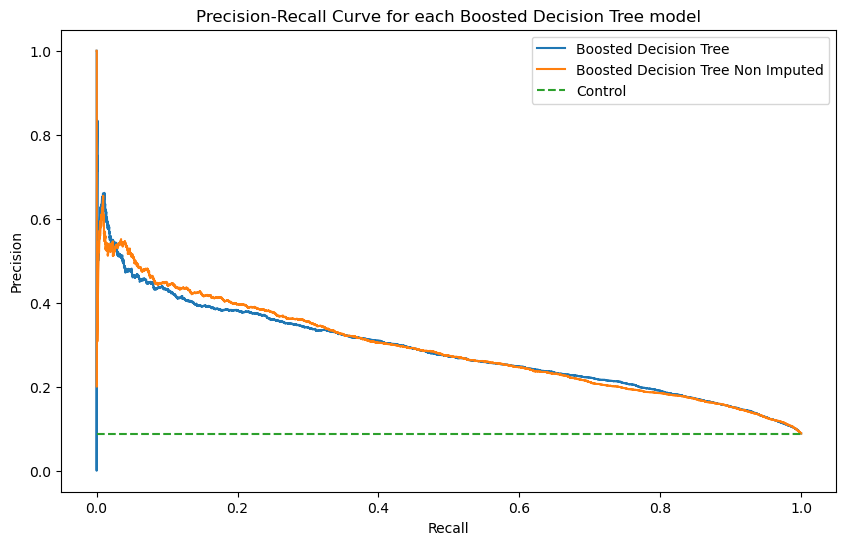

In [29]:
control_val = test.value_counts()[1] / len(test)
x=[0,1]
y=[control_val, control_val]
plt.figure(figsize=(10,6))
plt.plot(BDT_rec, BDT_pre, label='Boosted Decision Tree')
plt.plot(NM_rec, NM_pre, label='Boosted Decision Tree Non Imputed')


plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Boosted Decision Tree model')
plt.legend()
plt.show()

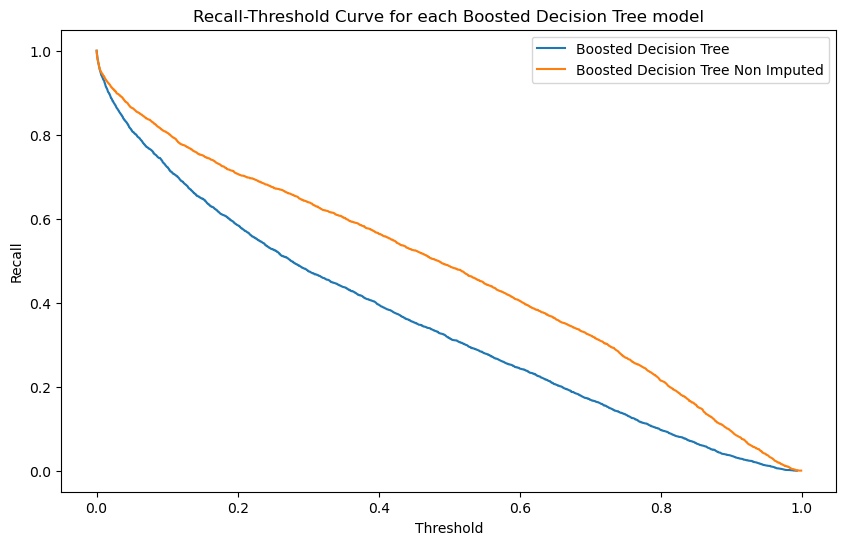

In [31]:
plt.figure(figsize=(10,6))
plt.plot(BDT_thr, BDT_rec[0:len(BDT_rec)-1], label='Boosted Decision Tree')
plt.plot(NM_thr, NM_rec[0:len(NM_rec)-1], label='Boosted Decision Tree Non Imputed')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall-Threshold Curve for each Boosted Decision Tree model')
plt.legend()
plt.show()

So the non imputed model performs best in the recall metric, with a very close result between the two in the precision-recall curve. Since we are favouring recall over precision, that would indicate that the non imputed model is preferred. For the sake of comparing like-to-like, we will continue to keep the imputed model in our comparisons below. If this was a competition setting, there would not be the situation that one model was trained on imputed data and another was not. 

## 4. Main Comparison

### 4.1 ROC (Receiver Operating Characteristic) Curve

ROC curves show how the true positive rate (TPR) and the false positive rate (FPR) change over different thresholds.

A perfect model would have 100% TPR and 0% FPR which corresponds with the curve lying in the upper-left corner of the graph. Therefore, the more a curve tends to the upper-left corner, the better the model predictions are according to ROC.

We now plot all of the ROC curves on the same graph. We also add a control curve which represents the performance of a truly random model (where both a positive and negative result are given a probability of 0.5).

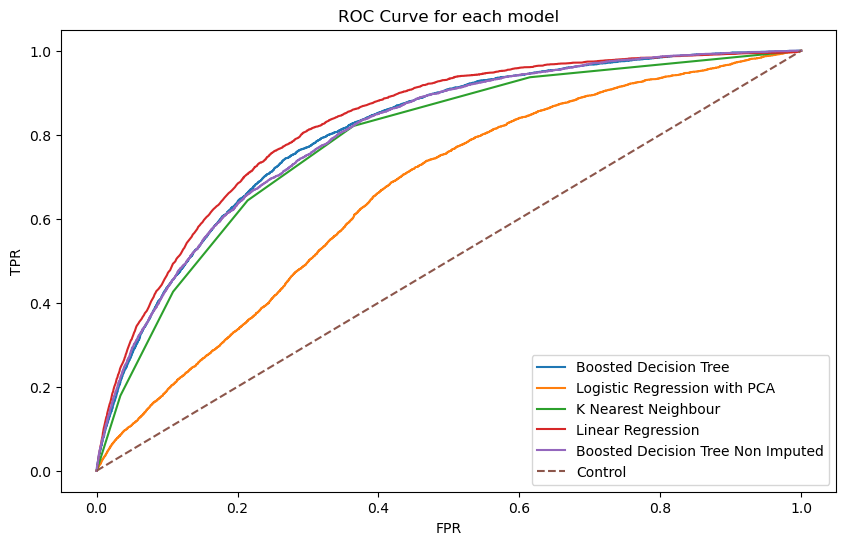

In [32]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(BDT_fpr, BDT_tpr, label='Boosted Decision Tree')
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression with PCA')
plt.plot(KNN_fpr, KNN_tpr, label='K Nearest Neighbour')
plt.plot(lin_fpr, lin_tpr, label='Linear Regression')
plt.plot(NM_fpr, NM_tpr, label='Boosted Decision Tree Non Imputed')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

We can visually see that all of the models have performed better than the control, with 4 of the models (boosted decision tree, boosted decision tree non imputed, K nearest neighbour and linear regression) performing similarly and the logistic regression with PCA model following behind. It is not very clear what is happening near the top of the curve so let's zoom in.

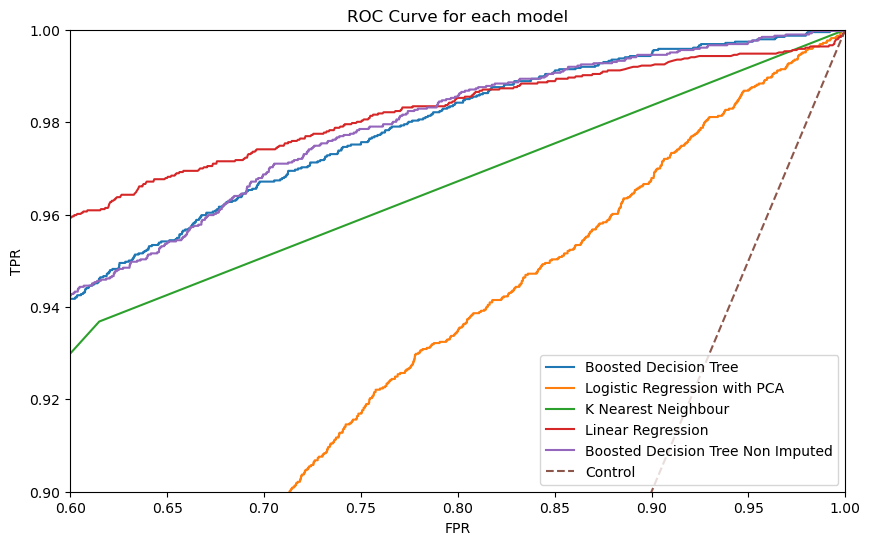

In [20]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(BDT_fpr, BDT_tpr, label='Boosted Decision Tree')
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression with PCA')
plt.plot(KNN_fpr, KNN_tpr, label='K Nearest Neighbour')
plt.plot(lin_fpr, lin_tpr, label='Linear Regression')
plt.plot(NM_fpr, NM_tpr, label='Boosted Decision Tree Non Imputed')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.axis([0.6,1,0.9,1])
plt.legend()
plt.show()

There is lots of overlapping occurring here. This means that the results of the ROC curve are definitely not decisive. The ROC curve might not always be the correct metric to use, especially when a dataset has high class imbalance, in which case the curve can be optimistic about models which in fact just predict a lot of the majority class.

The AUC scores give the following:

In [33]:
from sklearn.metrics import roc_auc_score
print("AUC Scores:")
print("Linear Regression: " + str(roc_auc_score(test, lin)))
print("Boosted Decision Tree: " + str(roc_auc_score(test, BDT)))
print("K Nearest Neighbour: " + str(roc_auc_score(test, KNN)))
print("Logistic Regression with PCA: " + str(roc_auc_score(test, LR)))

AUC Scores:
Linear Regression: 0.8261057507747035
Boosted Decision Tree: 0.8057904028769552
K Nearest Neighbour: 0.7851794239506134
Logistic Regression with PCA: 0.6604129668170541


Therefore, for the AUC metric, linear regression has performed the best, closely followed by the boosted decision tree and K nearest neighbour models, with the logistic regression with PCA model having the lowest AUC score.

### 4.2 Precision-Recall Curve

As explained on the following page: [Precision and Recall](https://towardsdatascience.com/precision-and-recall-88a3776c8007), precision is given by $\frac{TP}{(TP+FP)}$ and recall is given by $\frac{TP}{(TP+FN)}$ (T = True, F = False, P = Positive, N = Negative).

We note that the best model would be in the upper-right corner, so a model that tends towards the upper-right corner is determined to be the best for a precision-recall curve.

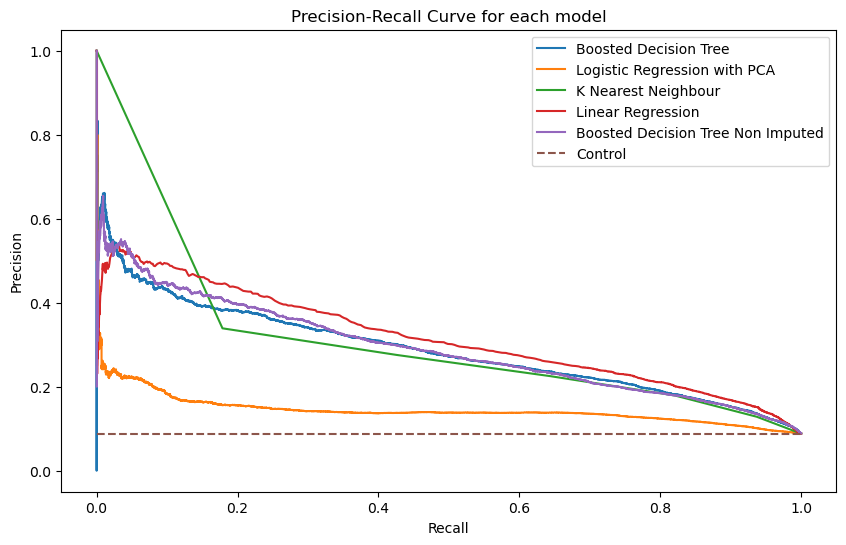

In [36]:
control_val = test.value_counts()[1] / len(test)
x=[0,1]
y=[control_val, control_val]
plt.figure(figsize=(10,6))
plt.plot(BDT_rec, BDT_pre, label='Boosted Decision Tree')
plt.plot(LR_rec, LR_pre, label='Logistic Regression with PCA')
plt.plot(KNN_rec, KNN_pre, label='K Nearest Neighbour')
#plt.plot(pres_rec, pres_pre, label='K Nearest Neighbour Preserved')
plt.plot(lin_rec, lin_pre, label='Linear Regression')
plt.plot(NM_rec, NM_pre, label='Boosted Decision Tree Non Imputed')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each model')
plt.legend()
plt.show()

Here, we have linear regression performing best, followed by the boosted decision trees, then KNN and then logistic regression with PCA.

From what we know about linear regression, intuitively we would expect it to be a pretty bad model for this problem. We now investigate that further and determine what is happening. We begin by inspecting the probability values.

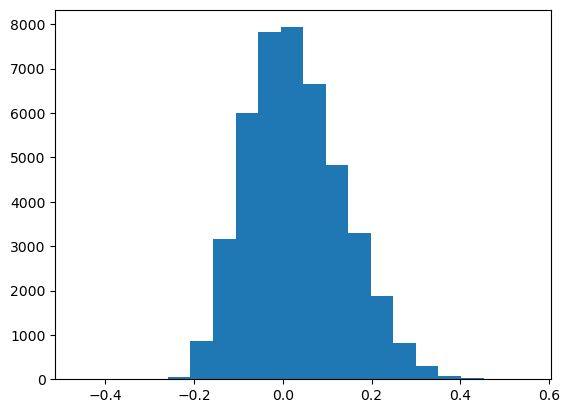

In [40]:
plt.hist(lin_df, 20)
plt.show()

So we can see that there are pretty much no values over 0.4, meaning for thresholds over 0.4, the model just predicts pretty much everything to be 0. Clearly this is what is giving it such a good ROC, AUC, and precision-recall but we know it would be pretty useless in practice, as it's recall would be very low.

Let's take a look at the Recall-Threshold and Precision-Threshold curves to investigate this further.

### 4.3 Recall-Threshold Curve

Similarly here, the best model is the model that tends towards the upper-right corner (high recall despite a high threshold).

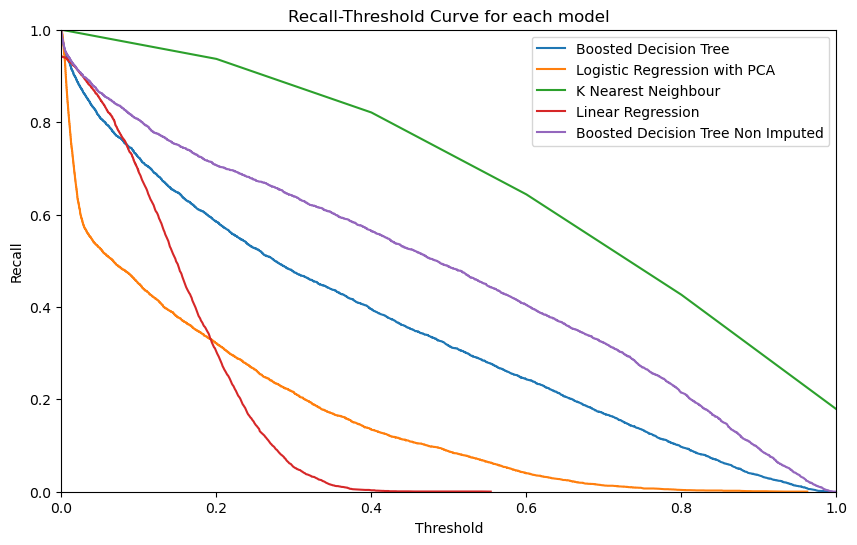

In [38]:
plt.figure(figsize=(10,6))
plt.plot(BDT_thr, BDT_rec[0:len(BDT_rec)-1], label='Boosted Decision Tree')
plt.plot(LR_thr, LR_rec[0:len(LR_rec)-1], label='Logistic Regression with PCA')
plt.plot(KNN_thr, KNN_rec[0:len(KNN_rec)-1], label='K Nearest Neighbour')
plt.plot(lin_thr, lin_rec[0:len(lin_rec)-1], label='Linear Regression')
#plt.plot(pres_thr, pres_rec[0:len(pres_rec)-1], label='K Nearest Neighbour Preserved')
plt.plot(NM_thr, NM_rec[0:len(NM_rec)-1], label='Boosted Decision Tree Non Imputed')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall-Threshold Curve for each model')
plt.legend()
plt.axis([0,1,0,1])
plt.show()

KNN performs best here, followed by the boosted decision trees, with linear and logistic regressions performing worst.

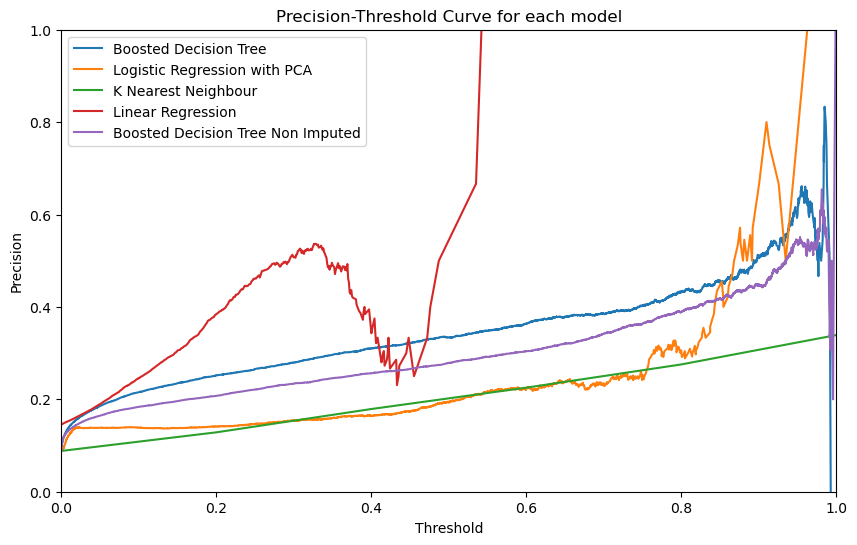

In [41]:
plt.figure(figsize=(10,6))
plt.plot(BDT_thr, BDT_pre[0:len(BDT_rec)-1], label='Boosted Decision Tree')
plt.plot(LR_thr, LR_pre[0:len(LR_rec)-1], label='Logistic Regression with PCA')
plt.plot(KNN_thr, KNN_pre[0:len(KNN_rec)-1], label='K Nearest Neighbour')
plt.plot(lin_thr, lin_pre[0:len(lin_rec)-1], label='Linear Regression')
#plt.plot(pres_thr, pres_rec[0:len(pres_rec)-1], label='K Nearest Neighbour Preserved')
plt.plot(NM_thr, NM_pre[0:len(NM_rec)-1], label='Boosted Decision Tree Non Imputed')

plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision-Threshold Curve for each model')
plt.legend()
plt.axis([0,1,0,1])
plt.show()

There are clearly different winners here at different points, with probably the boosted decision tree models performing best overall, followed by the logistic regression and then the KNN. The linear regression model is demonstrating what we discussed previously: around 0.5 the precision goes to 1, and this is because there are no positives predicted. Therefore, FP=0, TP=0 and Precision = 0/0, for which the computer must assign a value of 1. Of course, the idea of precision actually doesn't make sense in this case, and the model is not just really good. Therefore we disregard the results from before about the linear regression model and assign it as the worst.

## 5. Evaluation

For our problem, we recognise that achieving a low false negative rate is more important than achieving a low false positive rate. However, that must of course be balanced with the number of positives that it makes sense to predict if each positive prediction will lead to a heart disease screening, which requires resources. A classifier that predicts all positives would achieve a recall of 1 for all thresholds, but clearly it is useless. Therefore, we must prioritise recall but balance it against precision. Thus for our performance metric, we will use both the Precision-Threshold curves and the Precision-Recall curves.

We note that compared to the KNN model, the BDTs shared the same characteristics of performing better on Precision-Recall but worse on Precision. So for the competition element, we will consider choosing between the BDT trained on the imputed data and the KNN models. To select between KNN and the boosted decision tree as the "winner" for this problem, we must choose how much weight is given to the metrics of Precision-Recall and Recall-Threshold. To do this, we would need to complete further analysis on how to weight recall against precision. It would depend on things like the cost and capacity of screenings, and the value of detecting the disease before it occurs, which we are not in a position to quantify currently.

We do have some ideas of how we might go about finishing this evaluation if we did have this information and it will be expanded on in the Discussion section.